# AIRLINE - CUSTOMER SATISFACTION

<span style="color:gray">**INFORMACIÓN**</span>

- Archivo extraído de https://www.kaggle.com/datasets/sjleshrac/airlines-customer-satisfaction
- Idea disparadora: crear un modelo que prediga la compra de un pasajero de ómnibus según su comportamiento en el pasado o el comporamiento de usuarios con características similares. Dado que no conseguí un dataset de este estilo, extraje uno de una aerolínea y puedo replicarlo en caso de conseguir la información requerida

<span style="color:gray">**ÍNDICE**</span>

1) Antes de empezar 
2) Resumen de la entrega anterior
3) Visualización

### 1) Antes de empezar

In [106]:
from colorama import Fore, Style
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('bmh')
from tabulate import tabulate

### 2) Resumen de la entrega anterior

In [111]:
# Importo el dataset
print(Style.BRIGHT+Fore.LIGHTMAGENTA_EX+'¿Qué tamaño tiene el dataset?'+Style.RESET_ALL)
import pandas as pd
df_airline = pd.read_excel("C:/Users/Flori/CODERHOUSE/airlinesatisfaction.xlsx")  
print(df_airline.shape)

print()

# Tipo de dato y columnas que tengo
print(Style.BRIGHT+Fore.LIGHTMAGENTA_EX+'Columnas presentes y tipos de datos en el dataset'+Style.RESET_ALL)
tipos_de_datos_al = df_airline.dtypes
print(tipos_de_datos_al)

print()

# Información de cada campo object
print(Style.BRIGHT+Fore.LIGHTMAGENTA_EX+'Datos en cada campo object'+Style.RESET_ALL)
satisf = df_airline['satisfaction'].unique()
cust_type = df_airline['Customer Type'].unique()
type_travel = df_airline['Type of Travel'].unique()
cust_class = df_airline['Class'].unique()
print(satisf)
print(cust_type)
print(type_travel)
print(cust_class)

# Reemplazo los datos faltantes por cero por la naturaleza de los datos

df_airline['Arrival Delay in Minutes'] = df_airline['Arrival Delay in Minutes'].fillna(0)

df_airline['satisfaction'] = df_airline['satisfaction'].str.title()
df_airline['Customer Type'] = df_airline['Customer Type'].str.title()
df_airline['Type of Travel'] = df_airline['Type of Travel'].str.title()
df_airline['Class'] = df_airline['Class'].str.title()


¿Qué tamaño tiene el dataset?
(129880, 23)

Columnas presentes y tipos de datos en el dataset
satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online

Para entender la satisfacción es importante entender las características del viaje, por ende toda la información que trae es relevante. Por esto, consideraría:
- GROUP BY Type of Travel, Customer Type y Class -- a mejor clase o loyalty el servicio debería mejorar
- Edad promedio y Gender -- la paciencia no es la misma y la experiencia tampoco
- Cantidad de condiciones = 5 que posee, es decir si tuvo comida, si el asiento era cómodo, el servicio etc -- puede permitirle al usuario subir de categoría o ayudarme a predecir en qué status de satisfacción estará
- Debería definir una variable "Estado de vuelo" que permita evaluar si el vuelo fue bueno, malo, regular dependiendo del tiempo de espera
- Cantidad de usuarios en cada una de las características
- Porcentaje de usuarios en Satisfied vs dissatisfied para entender si el servicio overall es bueno o necesita mejoras ASAP
- Tiempo promedio de vuelo
- Tiempo de retraso promedio
- Cantidad de valijas
- Distancia media

### 3) Visualizaciones

<span style="color:gray">**MATPLOTLIB**</span>

Quiero entender en primer lugar el porcentaje de usuarios en Satisfied vs Dissatisfied para entender si el servicio overall es bueno o necesita mejoras urgentes. Los resultados muestran que hay más usuarios satisfechos que insatisfechos, sin embargo, la proporción es casi 50 a 50, por ende se requerirán mejoras

satisfaction
Satisfied       71087
Dissatisfied    58793
Name: count, dtype: int64


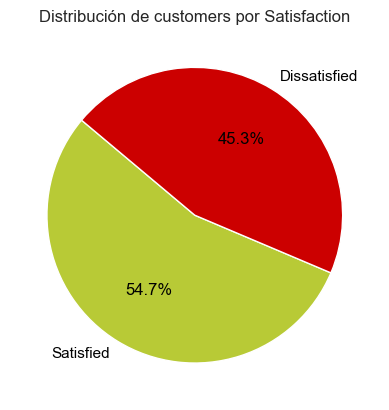

In [169]:
# Realizo un gráfico un pie chart
frecuencia_satisf = df_airline['satisfaction'].value_counts()
print(frecuencia_satisf)

satisf = frecuencia_satisf.index
valores = frecuencia_satisf.values

# Defino una lista de colores para los valores del gráfico
colores = ['#B8CA36','#CC0000']

# Creo un pie chart
plt.pie(valores, labels=satisf, colors=colores, shadow=False, startangle=140, autopct='%1.1f%%',textprops={'color': 'black'})

plt.title('Distribución de customers por Satisfaction')

plt.show()

Relación entre la clase y la satisfacción.
Como puede ser previsto, a mejor clase (business), más satisfechos se encuentran los usuarios.

| Class    |   Dissatisfied |   Satisfied |
|----------+----------------+-------------|
| Business |          18065 |       44095 |
| Eco      |          35336 |       22973 |
| Eco Plus |           5392 |        4019 |


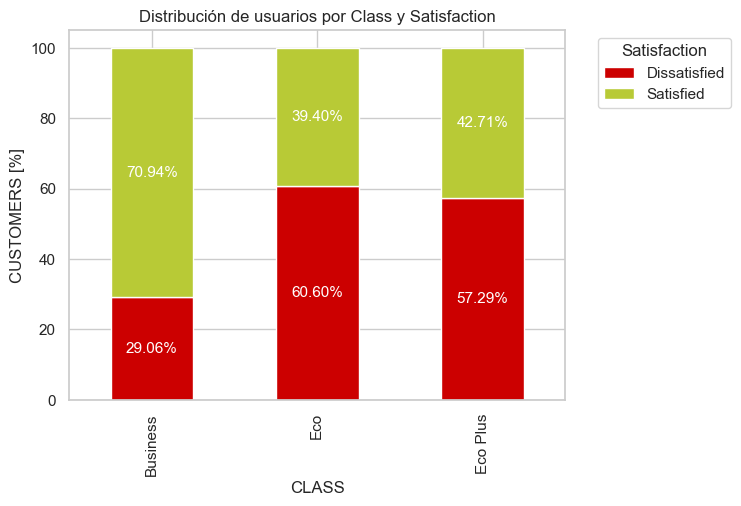

In [177]:
# Creo tabla dinámica
class_customer = pd.pivot_table(df_airline, index=['Class'], columns=['satisfaction'], aggfunc='size', fill_value=0)

# Imprimo la tabla con el formato tabulate
tabla = class_customer.reset_index()
tabla_formateada = tabulate(tabla, headers='keys', tablefmt='orgtbl', showindex=False)
print(tabla_formateada)

# Calculo los pesos de cada intersección
clas_customer_pct = class_customer.div(class_customer.sum(axis=1), axis=0) * 100

# Defino una lista de colores para los valores del gráfico
colores = ['#CC0000', '#B8CA36']

# Creo un gráfico de barras apiladas
ax = clas_customer_pct.plot.bar(stacked=True,  color=colores)

plt.title('Distribución de usuarios por Class y Satisfaction')
plt.xlabel('CLASS')
plt.ylabel('CUSTOMERS [%]')

# Leyenda
plt.legend(title='Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')

# Etiquetas
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=11, color='white')

plt.show()

Gráfico de dispersión para Departure Delay in Minutes vs. Arrival Delay in Minutes. Este gráfico sirve para entender si los retrasos en la salida están relacionados con los retrasos en la llegada.
Dado el R2 hay una fuerte correlación entre estas dos variables

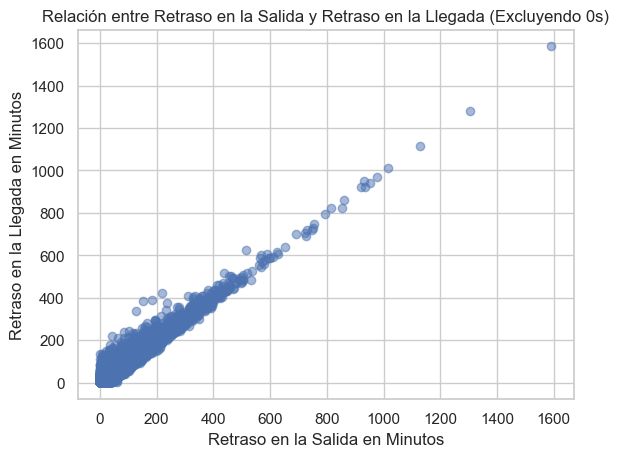

0.930635688026449
Ecuación de la línea de tendencia: y = 0.98x + 0.74


In [190]:
# Excluyo las columnas que contienen ceros en ambas columnas
df_filtered = df_airline[(df_airline['Departure Delay in Minutes'] != 0) & (df_airline['Arrival Delay in Minutes'] != 0)]

# Extraigo las columnas de interés del df filtrado
departure_delay = df_filtered['Departure Delay in Minutes']
arrival_delay = df_filtered['Arrival Delay in Minutes']

# Creo el gráfico de dispersión
plt.scatter(departure_delay, arrival_delay, alpha=0.5)  # alpha controla la transparencia de los puntos

plt.xlabel('Retraso en la Salida en Minutos')
plt.ylabel('Retraso en la Llegada en Minutos')

plt.title('Relación entre Retraso en la Salida y Retraso en la Llegada (Excluyendo 0s)')

plt.show()


#Análisis estadístico de la tendencia
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import numpy as np

#R cuadrado
r_squared = r2_score(departure_delay, arrival_delay)
print(r_squared)

#Ecuación lineal
X = departure_delay.to_numpy().reshape(-1, 1)
y = arrival_delay.to_numpy()

# Ajusta un modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Obtiene los coeficientes del modelo
pendiente = modelo.coef_[0]
intercepto = modelo.intercept_
print(f"Ecuación de la línea de tendencia: y = {pendiente:.2f}x + {intercepto:.2f}")


<span style="color:gray">**SEABORN**</span>

Relación entre el tipo de Customer (su engagement con la agencia) vs su Satisfacción con el vuelo. Este gráfico sirve para entender si los usuarios más engaged se encuentran más a gusto con la empresa, estos son los primeros usuarios que uno pretendería retener.
La relación es 60 a 30 en los usuarios "Loyal", hay oportunidad de mejora, pero el resultado es positivo.

| Customer Type     |   Dissatisfied |   Satisfied |
|-------------------+----------------+-------------|
| Disloyal Customer |          18080 |        5700 |
| Loyal Customer    |          40713 |       65387 |


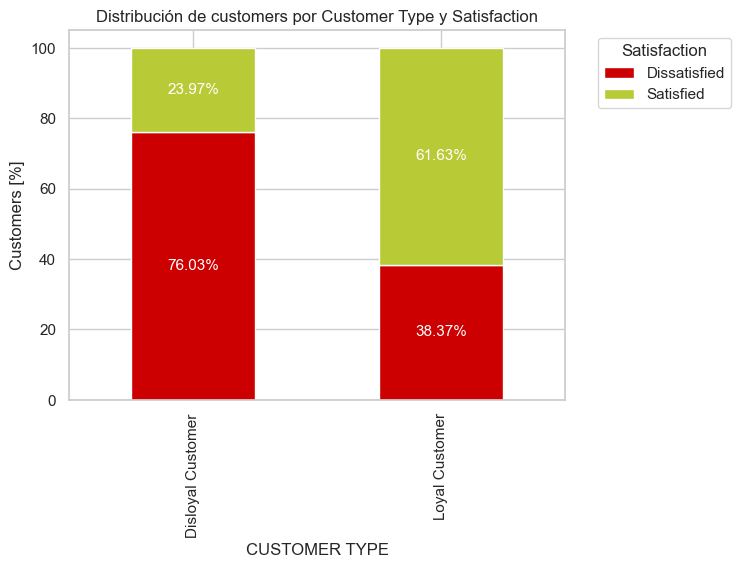

In [115]:
# Creo tabla dinámica
customer = pd.pivot_table(df_airline, index=['Customer Type'], columns=['satisfaction'], aggfunc='size', fill_value=0)

# Imprimo la tabla con el formato tabulate
tabla = customer.reset_index()
tabla_formateada = tabulate(tabla, headers='keys', tablefmt='orgtbl', showindex=False)
print(tabla_formateada)

# Calculo los pesos de cada intersección
customer_pct = customer.div(customer.sum(axis=1), axis=0) * 100

# Configuro el estilo de Seaborn
sns.set(style='whitegrid')

# Defino una lista de colores para los valores del gráfico
colores = ['#CC0000', '#B8CA36']

# Creo un gráfico de barras apiladas con Seaborn
ax = customer_pct.plot(kind='bar', stacked=True, color=colores)

plt.title('Distribución de customers por Customer Type y Satisfaction')
plt.xlabel('CUSTOMER TYPE')
plt.ylabel('Customers [%]')

# Leyenda
plt.legend(title='Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')

# Etiquetas
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=11, color='white')

plt.show()

Distribución de la edad de los usuarios que responden la encuesta mediante un histograma. 
La mayoría de los usuarios se encuentran entre los 20 y los 50 años.

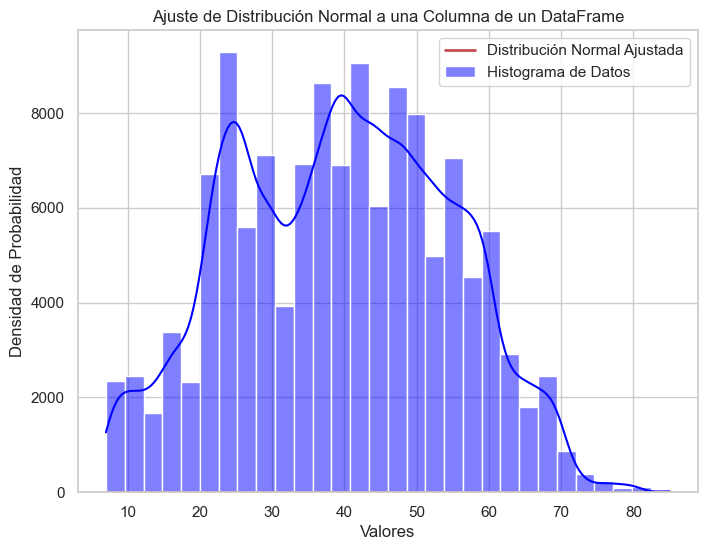

La moda de las edades es: 39


In [201]:
# Configuro el estilo de Seaborn
sns.set(style='whitegrid')

# Extrae los datos de la columna "Datos" del DataFrame
datos = df_airline['Age']

# Crea un histograma de los datos
plt.figure(figsize=(8, 6))
sns.histplot(datos, kde=True, bins=30, color='blue', label='Histograma de Datos')

# Ajusta una distribución normal a los datos
media, desviacion_estandar = norm.fit(datos)

# Calcula la PDF (Función de Densidad de Probabilidad) de la distribución ajustada
x = np.linspace(datos.min(), datos.max(), 100)
pdf = norm.pdf(x, loc=media, scale=desviacion_estandar)

# Plotea la distribución ajustada
plt.plot(x, pdf, 'r-', linewidth=2, label='Distribución Normal Ajustada')

# Etiquetas y leyenda
plt.xlabel('Valores')
plt.ylabel('Densidad de Probabilidad')
plt.legend()

# Muestra el gráfico
plt.title('Ajuste de Distribución Normal a una Columna de un DataFrame')
plt.show()

moda_edades = df_airline['Age'].mode()
if len(moda_edades) > 1:
    print("Las modas de las edades son:")
    for moda in moda_edades:
        print(moda)
else:
    print(f"La moda de las edades es: {moda_edades.values[0]}")


Gráfico de barras apiladas para Class y Type of Travel.Distribución de las clases de vuelo entre los tipos de viaje. Se pueden hacer convenios con empresas

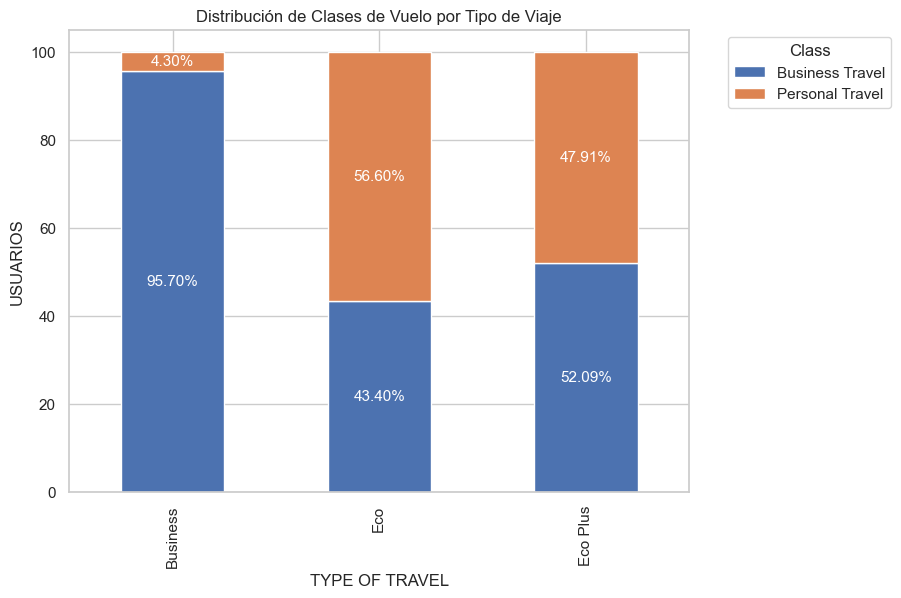

In [220]:
# Agrupo los datos por Class y Type of Travel y cuento la cantidad de usuarios
agrupado = df_airline.groupby(['Class', 'Type of Travel']).size().unstack(fill_value=0)

agrupado_pct = agrupado.div(agrupado.sum(axis=1), axis=0) * 100

# Crea un gráfico de barras apiladas
ax = agrupado_pct.plot(kind='bar', stacked=True, figsize=(8, 6))

# Etiquetas y leyendas
plt.xlabel('TYPE OF TRAVEL')
plt.ylabel('USUARIOS')
plt.title('Distribución de Clases de Vuelo por Tipo de Viaje')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')


# Etiquetas
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=11, color='white')

# Muestra el gráfico
plt.show()



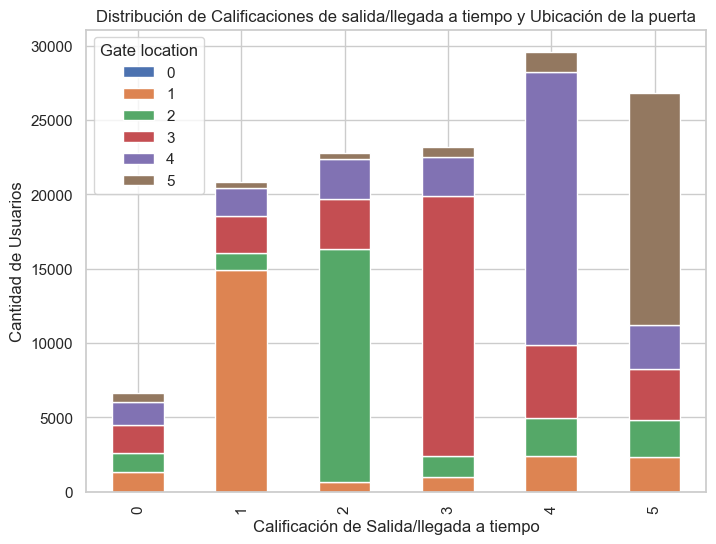

In [226]:

# Agrupa los datos por las columnas "Seat comfort" y "Cleanliness" y cuenta las ocurrencias
agrupado = df_airline.groupby(['Departure/Arrival time convenient', 'Gate location']).size().unstack(fill_value=0)

# Crea un gráfico de barras apiladas
ax = agrupado.plot(kind='bar', stacked=True, figsize=(8, 6))

# Etiquetas y leyendas
plt.xlabel('Calificación de Salida/llegada a tiempo')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución de Calificaciones de salida/llegada a tiempo y Ubicación de la puerta')
plt.legend(title='Gate location')

# Muestra el gráfico
plt.show()

